In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.stats import linregress
from sklearn import datasets
from sklearn import linear_model
import statsmodels.api as sm

In [4]:
#Imported 4 sets of data
vivino_file_red = "red_wine_0to400_anyrating.csv"
vivino_file_sparkling = "sparkling_wine_0to400_anyrating.csv"
vivino_file_white = "white_wine_0to400_anyrating (1).csv"
winemag_file = "winemag-data-130k-v2.csv"
winemag_file_df = pd.read_csv(winemag_file)
vivino_file_red_df = pd.read_csv(vivino_file_red)
vivino_file_sparkling_df = pd.read_csv(vivino_file_sparkling)
vivino_file_white_df = pd.read_csv(vivino_file_white)

In [5]:
# merged red&white&sparkling and dropped NA values and got rid of Unnamed 0
vivino_merged_df = vivino_file_red_df.append(vivino_file_white_df)
vivino_merged_df = vivino_merged_df.append(vivino_file_sparkling_df)
vivino_merged_df

,Unnamed: 0,Name,Rating,Price,NumberOfRatings,Country,Winery
0,0,Cobos Marchiori Vineyard Malbec 2015,4.8,$223.99,669 ratings,Argentina,Viña Cobos
1,1,Adrianna Vineyard River Stones Malbec 2015,4.8,$173.99,190 ratings,Argentina,Catena Zapata
2,2,Darius II Cabernet Sauvignon 2016,4.8,$324.99,104 ratings,United States,Darioush
3,3,Saint-Émilion Grand Cru 2014,4.8,$183.99,98 ratings,France,Château Tertre Roteboeuf
4,4,Fortis Cabernet Sauvignon 2014,4.8,$299.99,91 ratings,United States,Pine Ridge
...,...,...,...,...,...,...,...
1961,1961,La Grande Année Brut Champagne 2004,4.5,View shops,3097 ratings,France,Bollinger
1962,1962,Brut Champagne 2005,4.5,View shops,2981 ratings,France,Dom Pérignon
1963,1963,La Grande Dame Brut Champagne 2006,4.5,View shops,2689 ratings,France,Veuve Clicquot
1964,1964,La Grande Dame Brut Champagne 2004,4.5,View shops,2338 ratings,France,Veuve Clicquot


In [6]:
vivino_merged_df = vivino_merged_df.drop(['Unnamed: 0'], axis=1)
vivino_merged_df

,Name,Rating,Price,NumberOfRatings,Country,Winery
0,Cobos Marchiori Vineyard Malbec 2015,4.8,$223.99,669 ratings,Argentina,Viña Cobos
1,Adrianna Vineyard River Stones Malbec 2015,4.8,$173.99,190 ratings,Argentina,Catena Zapata
2,Darius II Cabernet Sauvignon 2016,4.8,$324.99,104 ratings,United States,Darioush
3,Saint-Émilion Grand Cru 2014,4.8,$183.99,98 ratings,France,Château Tertre Roteboeuf
4,Fortis Cabernet Sauvignon 2014,4.8,$299.99,91 ratings,United States,Pine Ridge
...,...,...,...,...,...,...
1961,La Grande Année Brut Champagne 2004,4.5,View shops,3097 ratings,France,Bollinger
1962,Brut Champagne 2005,4.5,View shops,2981 ratings,France,Dom Pérignon
1963,La Grande Dame Brut Champagne 2006,4.5,View shops,2689 ratings,France,Veuve Clicquot
1964,La Grande Dame Brut Champagne 2004,4.5,View shops,2338 ratings,France,Veuve Clicquot


In [7]:
vivino_merged_df = vivino_merged_df.dropna()
vivino_merged_df.head()

,Name,Rating,Price,NumberOfRatings,Country,Winery
0,Cobos Marchiori Vineyard Malbec 2015,4.8,$223.99,669 ratings,Argentina,Viña Cobos
1,Adrianna Vineyard River Stones Malbec 2015,4.8,$173.99,190 ratings,Argentina,Catena Zapata
2,Darius II Cabernet Sauvignon 2016,4.8,$324.99,104 ratings,United States,Darioush
3,Saint-Émilion Grand Cru 2014,4.8,$183.99,98 ratings,France,Château Tertre Roteboeuf
4,Fortis Cabernet Sauvignon 2014,4.8,$299.99,91 ratings,United States,Pine Ridge


In [8]:
# removed unnamed column and replaced United States with US
vivino_merged_df["Country"]= vivino_merged_df["Country"].replace("United States", "US")
vivino_merged_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Rating,Price,NumberOfRatings,Country,Winery
0,Cobos Marchiori Vineyard Malbec 2015,4.8,$223.99,669 ratings,Argentina,Viña Cobos
1,Adrianna Vineyard River Stones Malbec 2015,4.8,$173.99,190 ratings,Argentina,Catena Zapata
2,Darius II Cabernet Sauvignon 2016,4.8,$324.99,104 ratings,US,Darioush
3,Saint-Émilion Grand Cru 2014,4.8,$183.99,98 ratings,France,Château Tertre Roteboeuf
4,Fortis Cabernet Sauvignon 2014,4.8,$299.99,91 ratings,US,Pine Ridge
...,...,...,...,...,...,...
1961,La Grande Année Brut Champagne 2004,4.5,View shops,3097 ratings,France,Bollinger
1962,Brut Champagne 2005,4.5,View shops,2981 ratings,France,Dom Pérignon
1963,La Grande Dame Brut Champagne 2006,4.5,View shops,2689 ratings,France,Veuve Clicquot
1964,La Grande Dame Brut Champagne 2004,4.5,View shops,2338 ratings,France,Veuve Clicquot


In [9]:
#Remove " View Shop" prices
vivino_merged_df= vivino_merged_df[vivino_merged_df.Price.str.contains("View shops") == False]
vivino_merged_df

,Name,Rating,Price,NumberOfRatings,Country,Winery
0,Cobos Marchiori Vineyard Malbec 2015,4.8,$223.99,669 ratings,Argentina,Viña Cobos
1,Adrianna Vineyard River Stones Malbec 2015,4.8,$173.99,190 ratings,Argentina,Catena Zapata
2,Darius II Cabernet Sauvignon 2016,4.8,$324.99,104 ratings,US,Darioush
3,Saint-Émilion Grand Cru 2014,4.8,$183.99,98 ratings,France,Château Tertre Roteboeuf
4,Fortis Cabernet Sauvignon 2014,4.8,$299.99,91 ratings,US,Pine Ridge
...,...,...,...,...,...,...
1864,American Spumante N.V.,3.0,$5.99,199 ratings,US,J. Roget
1865,Cava Brut N.V.,2.9,$24.99,28 ratings,Spain,Elvi
1866,Extra Dry (California Champagne) N.V.,2.8,$6.95,393 ratings,US,Cook's
1867,American Champagne Brut N.V.,2.7,$4.99,884 ratings,US,J. Roget


In [10]:
#remove"$"
vivino_merged_df['Price'] = vivino_merged_df['Price'].str.replace('$','')
vivino_merged_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Rating,Price,NumberOfRatings,Country,Winery
0,Cobos Marchiori Vineyard Malbec 2015,4.8,223.99,669 ratings,Argentina,Viña Cobos
1,Adrianna Vineyard River Stones Malbec 2015,4.8,173.99,190 ratings,Argentina,Catena Zapata
2,Darius II Cabernet Sauvignon 2016,4.8,324.99,104 ratings,US,Darioush
3,Saint-Émilion Grand Cru 2014,4.8,183.99,98 ratings,France,Château Tertre Roteboeuf
4,Fortis Cabernet Sauvignon 2014,4.8,299.99,91 ratings,US,Pine Ridge
...,...,...,...,...,...,...
1864,American Spumante N.V.,3.0,5.99,199 ratings,US,J. Roget
1865,Cava Brut N.V.,2.9,24.99,28 ratings,Spain,Elvi
1866,Extra Dry (California Champagne) N.V.,2.8,6.95,393 ratings,US,Cook's
1867,American Champagne Brut N.V.,2.7,4.99,884 ratings,US,J. Roget


In [11]:
vivino = vivino_merged_df[vivino_merged_df.Price.str.contains("ratings") == False]
vivino

,Name,Rating,Price,NumberOfRatings,Country,Winery
0,Cobos Marchiori Vineyard Malbec 2015,4.8,223.99,669 ratings,Argentina,Viña Cobos
1,Adrianna Vineyard River Stones Malbec 2015,4.8,173.99,190 ratings,Argentina,Catena Zapata
2,Darius II Cabernet Sauvignon 2016,4.8,324.99,104 ratings,US,Darioush
3,Saint-Émilion Grand Cru 2014,4.8,183.99,98 ratings,France,Château Tertre Roteboeuf
4,Fortis Cabernet Sauvignon 2014,4.8,299.99,91 ratings,US,Pine Ridge
...,...,...,...,...,...,...
1864,American Spumante N.V.,3.0,5.99,199 ratings,US,J. Roget
1865,Cava Brut N.V.,2.9,24.99,28 ratings,Spain,Elvi
1866,Extra Dry (California Champagne) N.V.,2.8,6.95,393 ratings,US,Cook's
1867,American Champagne Brut N.V.,2.7,4.99,884 ratings,US,J. Roget


In [12]:
vivino["Price"].unique()

array(['223.99', '173.99', '324.99', '183.99', '299.99', '335.99',
       '349.97', '389.99', '186.98', '388.88', '119.85', '219.94',
       '249.99', '399.99', '285.99', '399', '299', '135', '300', '65.99',
       '338', '359.99', '241.99', '269.95', '174.88', '270', '400',
       '214.99', '274.99', '319', '309.97', '299.97', '374.99', '199.99',
       '189', '219.95', '369.99', '159.95', '384.99', '304', '239',
       '329.97', '329.99', '289.99', '169.95', '174.89', '205.99', '285',
       '109', '125', '279.99', '289.97', '299.95', '315', '129', '164.99',
       '240', '281.99', '349.95', '241.98', '289', '209', '169.90',
       '219.99', '119.99', '189.97', '224.95', '172', '174.99', '195.99',
       '349.99', '179.99', '225', '109.75', '224.99', '179', '151.99',
       '129.99', '275', '360', '195.95', '199', '259.99', '399.95',
       '139.95', '245', '59.99', '124.99', '149.94', '319.97', '169.99',
       '184.99', '104.99', '159.99', '316', '99.99', '199.95', '94.90',
       

In [13]:
# Convert price to integer
# vivino['Rating'] = pd.to_numeric(vivino['Rating'])
# vivino.astype({'Price': 'int32'}).dtypes
# pd.to_numeric(vivino["Price"], downcast='float')
# vivino['Rating'].astype(str).astype(float)
vivino["Rating"] = vivino["Rating"].map(float)
vivino["Price"] = vivino["Price"].map(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
vivino.head()

,Name,Rating,Price,NumberOfRatings,Country,Winery
0,Cobos Marchiori Vineyard Malbec 2015,4.8,223.99,669 ratings,Argentina,Viña Cobos
1,Adrianna Vineyard River Stones Malbec 2015,4.8,173.99,190 ratings,Argentina,Catena Zapata
2,Darius II Cabernet Sauvignon 2016,4.8,324.99,104 ratings,US,Darioush
3,Saint-Émilion Grand Cru 2014,4.8,183.99,98 ratings,France,Château Tertre Roteboeuf
4,Fortis Cabernet Sauvignon 2014,4.8,299.99,91 ratings,US,Pine Ridge


In [15]:
#Multiply rating by 20
vivino["Rating"] = 20 * vivino["Rating"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
bins = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400]
group_names = ["Below $20", "$20-40","40-$60", "$60-$80","$80-$100","$100-$120","$120-140","$140-$160","$160-$180","$180-$200","$200-$220","$220-$240","$240-$260","$260-$280","$280-$300","$300-$320","$320-$340","$340-$360","$360-$380","$380-$400"]

In [17]:
vivino["Group"] = pd.cut(vivino["Price"], bins, labels=group_names)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
vivino = vivino.rename(columns={ "Rating": "Mean Consumer Rating", "Price" : "Mean Consumer Prices"})
vivino_mean_group = vivino.groupby(["Group"]).mean()
# vivino_mean_country = vivino.groupby(['Country','Group']).mean()
vivino_mean_group

,Mean Consumer Rating,Mean Consumer Prices
Group,,
Below $20,75.862069,15.293458
$20-40,79.986766,30.107535
40-$60,83.008092,50.726902
$60-$80,85.057576,71.642803
$80-$100,87.037975,92.188502
$100-$120,88.078740,112.002087
$120-140,88.612245,131.506582
$140-$160,88.926554,151.165763
$160-$180,90.091429,172.755486


In [19]:
#Drop NA
# filter columns to Country, rating and price
#Rename columns
#Convert data if needed
winemag = winemag_file_df
# winemag = winemag["price"].dropna()
winemag = winemag.dropna(subset=['price'])
# winemag = winemag.dropna(how='any')
winemag = winemag.drop(['Unnamed: 0'], axis=1)
winemag = winemag.rename(columns={"country": "Country", "points": "Professional Rating", "price" : "Wine Mag Prices"})
winemag

,Country,description,designation,Professional Rating,Wine Mag Prices,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [20]:
bins = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400]
group_names = ["Below $20", "$20-40","40-$60", "$60-$80","$80-$100","$100-$120","$120-140","$140-$160","$160-$180","$180-$200","$200-$220","$220-$240","$240-$260","$260-$280","$280-$300","$300-$320","$320-$340","$340-$360","$360-$380","$380-$400"]
winemag["Group"] = pd.cut(winemag["Wine Mag Prices"], bins, labels=group_names)

In [21]:
winemag_mean = winemag.groupby(["Group"]).mean()
winemag_mean = winemag_mean.dropna()
winemag_mean

,Professional Rating,Wine Mag Prices
Group,,
Below $20,86.575344,15.071664
$20-40,88.618383,29.741173
40-$60,90.284243,50.239841
$60-$80,91.121838,70.809101
$80-$100,91.775551,91.606212
$100-$120,92.141684,112.314168
$120-140,92.279302,130.068579
$140-$160,92.688285,150.694561
$160-$180,93.140426,172.038298


In [22]:
#On average wine cellar 
merged_df= pd.merge(vivino_mean_group, winemag_mean, on="Group")
merged_df

,Mean Consumer Rating,Mean Consumer Prices,Professional Rating,Wine Mag Prices
Group,,,,
Below $20,75.862069,15.293458,86.575344,15.071664
$20-40,79.986766,30.107535,88.618383,29.741173
40-$60,83.008092,50.726902,90.284243,50.239841
$60-$80,85.057576,71.642803,91.121838,70.809101
$80-$100,87.037975,92.188502,91.775551,91.606212
$100-$120,88.078740,112.002087,92.141684,112.314168
$120-140,88.612245,131.506582,92.279302,130.068579
$140-$160,88.926554,151.165763,92.688285,150.694561
$160-$180,90.091429,172.755486,93.140426,172.038298


In [23]:
merged_df = merged_df.reset_index('Group')

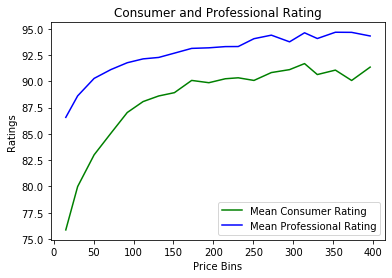

In [44]:
plt.plot(merged_df["Mean Consumer Prices"],merged_df["Mean Consumer Rating"], color="green", label="Mean Consumer Rating")
plt.plot(merged_df["Mean Consumer Prices"],merged_df["Professional Rating"], color="blue", label="Mean Professional Rating")
plt.legend(loc="best")
plt.title("Consumer and Professional Rating")
plt.xlabel("Price Bins")
plt.ylabel("Ratings")
plt.savefig("Images/Consumer Rating vs Professional Rating.png")

The r-squared is: 0.6554337538059041


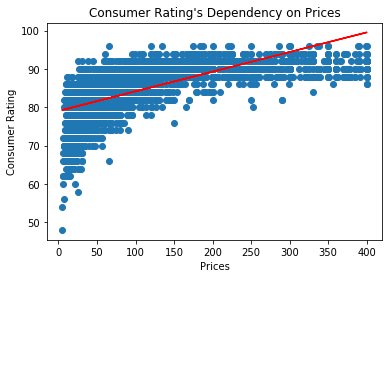

In [45]:
# In what way does consumer rating depend on prices?
y_values = vivino["Mean Consumer Rating"]
x_values = vivino["Mean Consumer Prices"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Consumer Rating's Dependency on Prices")
plt.ylabel('Consumer Rating')
plt.xlabel('Prices')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Consumer Rating's Dependency on Prices.png")
plt.show()

The r-squared is: 0.4161667418606225


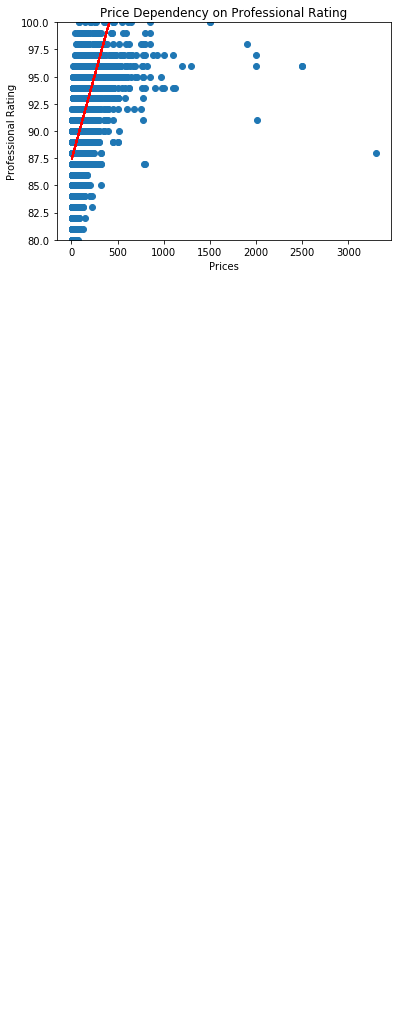

In [46]:
# In what way does price depend on professional rating?
y_values =winemag["Professional Rating"]
x_values = winemag["Wine Mag Prices"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylim((80,100))
plt.title("Price Dependency on Professional Rating")
plt.ylabel('Professional Rating')
plt.xlabel('Prices')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Price Dependency on Professional Rating.png")
plt.show()

The r-squared is: 0.5470680050253198


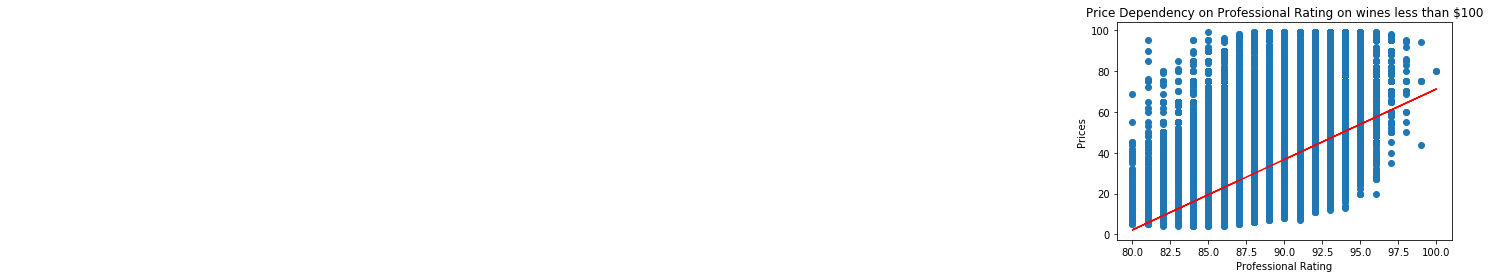

In [47]:
#Lets look at in what way does price depend on professional rating in wines under $100?
filtered_winemag_df = winemag.loc[winemag["Wine Mag Prices"] < 100]
x_values = filtered_winemag_df["Professional Rating"]
y_values = filtered_winemag_df["Wine Mag Prices"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Price Dependency on Professional Rating on wines less than $100")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.xlabel('Professional Rating')
plt.ylabel('Prices')
plt.savefig("Images/Price Dependency on Professional Rating on wines less than $100.png")
plt.show()

In [50]:
X = merged_df[['Professional Rating','Wine Mag Prices']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = merged_df['Mean Consumer Rating']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_Professional_Rating = 90
New_Wine_Mag_Prices = 30
print ('Predicted Consumer Rating: \n', regr.predict([[New_Professional_Rating ,New_Wine_Mag_Prices]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -123.57458059640558
Coefficients: 
 [ 2.30298264 -0.00791438]
Predicted Consumer Rating: 
 [83.45642541]
                             OLS Regression Results                             
Dep. Variable:     Mean Consumer Rating   R-squared:                       0.971
Model:                              OLS   Adj. R-squared:                  0.968
Method:                   Least Squares   F-statistic:                     287.9
Date:                  Wed, 18 Mar 2020   Prob (F-statistic):           7.74e-14
Time:                          20:15:38   Log-Likelihood:                -20.980
No. Observations:                    20   AIC:                             47.96
Df Residuals:                        17   BIC:                             50.95
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [29]:
merged_df

,Group,Mean Consumer Rating,Mean Consumer Prices,Professional Rating,Wine Mag Prices
0,Below $20,75.862069,15.293458,86.575344,15.071664
1,$20-40,79.986766,30.107535,88.618383,29.741173
2,40-$60,83.008092,50.726902,90.284243,50.239841
3,$60-$80,85.057576,71.642803,91.121838,70.809101
4,$80-$100,87.037975,92.188502,91.775551,91.606212
5,$100-$120,88.078740,112.002087,92.141684,112.314168
6,$120-140,88.612245,131.506582,92.279302,130.068579
7,$140-$160,88.926554,151.165763,92.688285,150.694561
8,$160-$180,90.091429,172.755486,93.140426,172.038298
9,$180-$200,89.874126,194.277902,93.194872,195.292308


The r-squared is: 0.9796035783504634


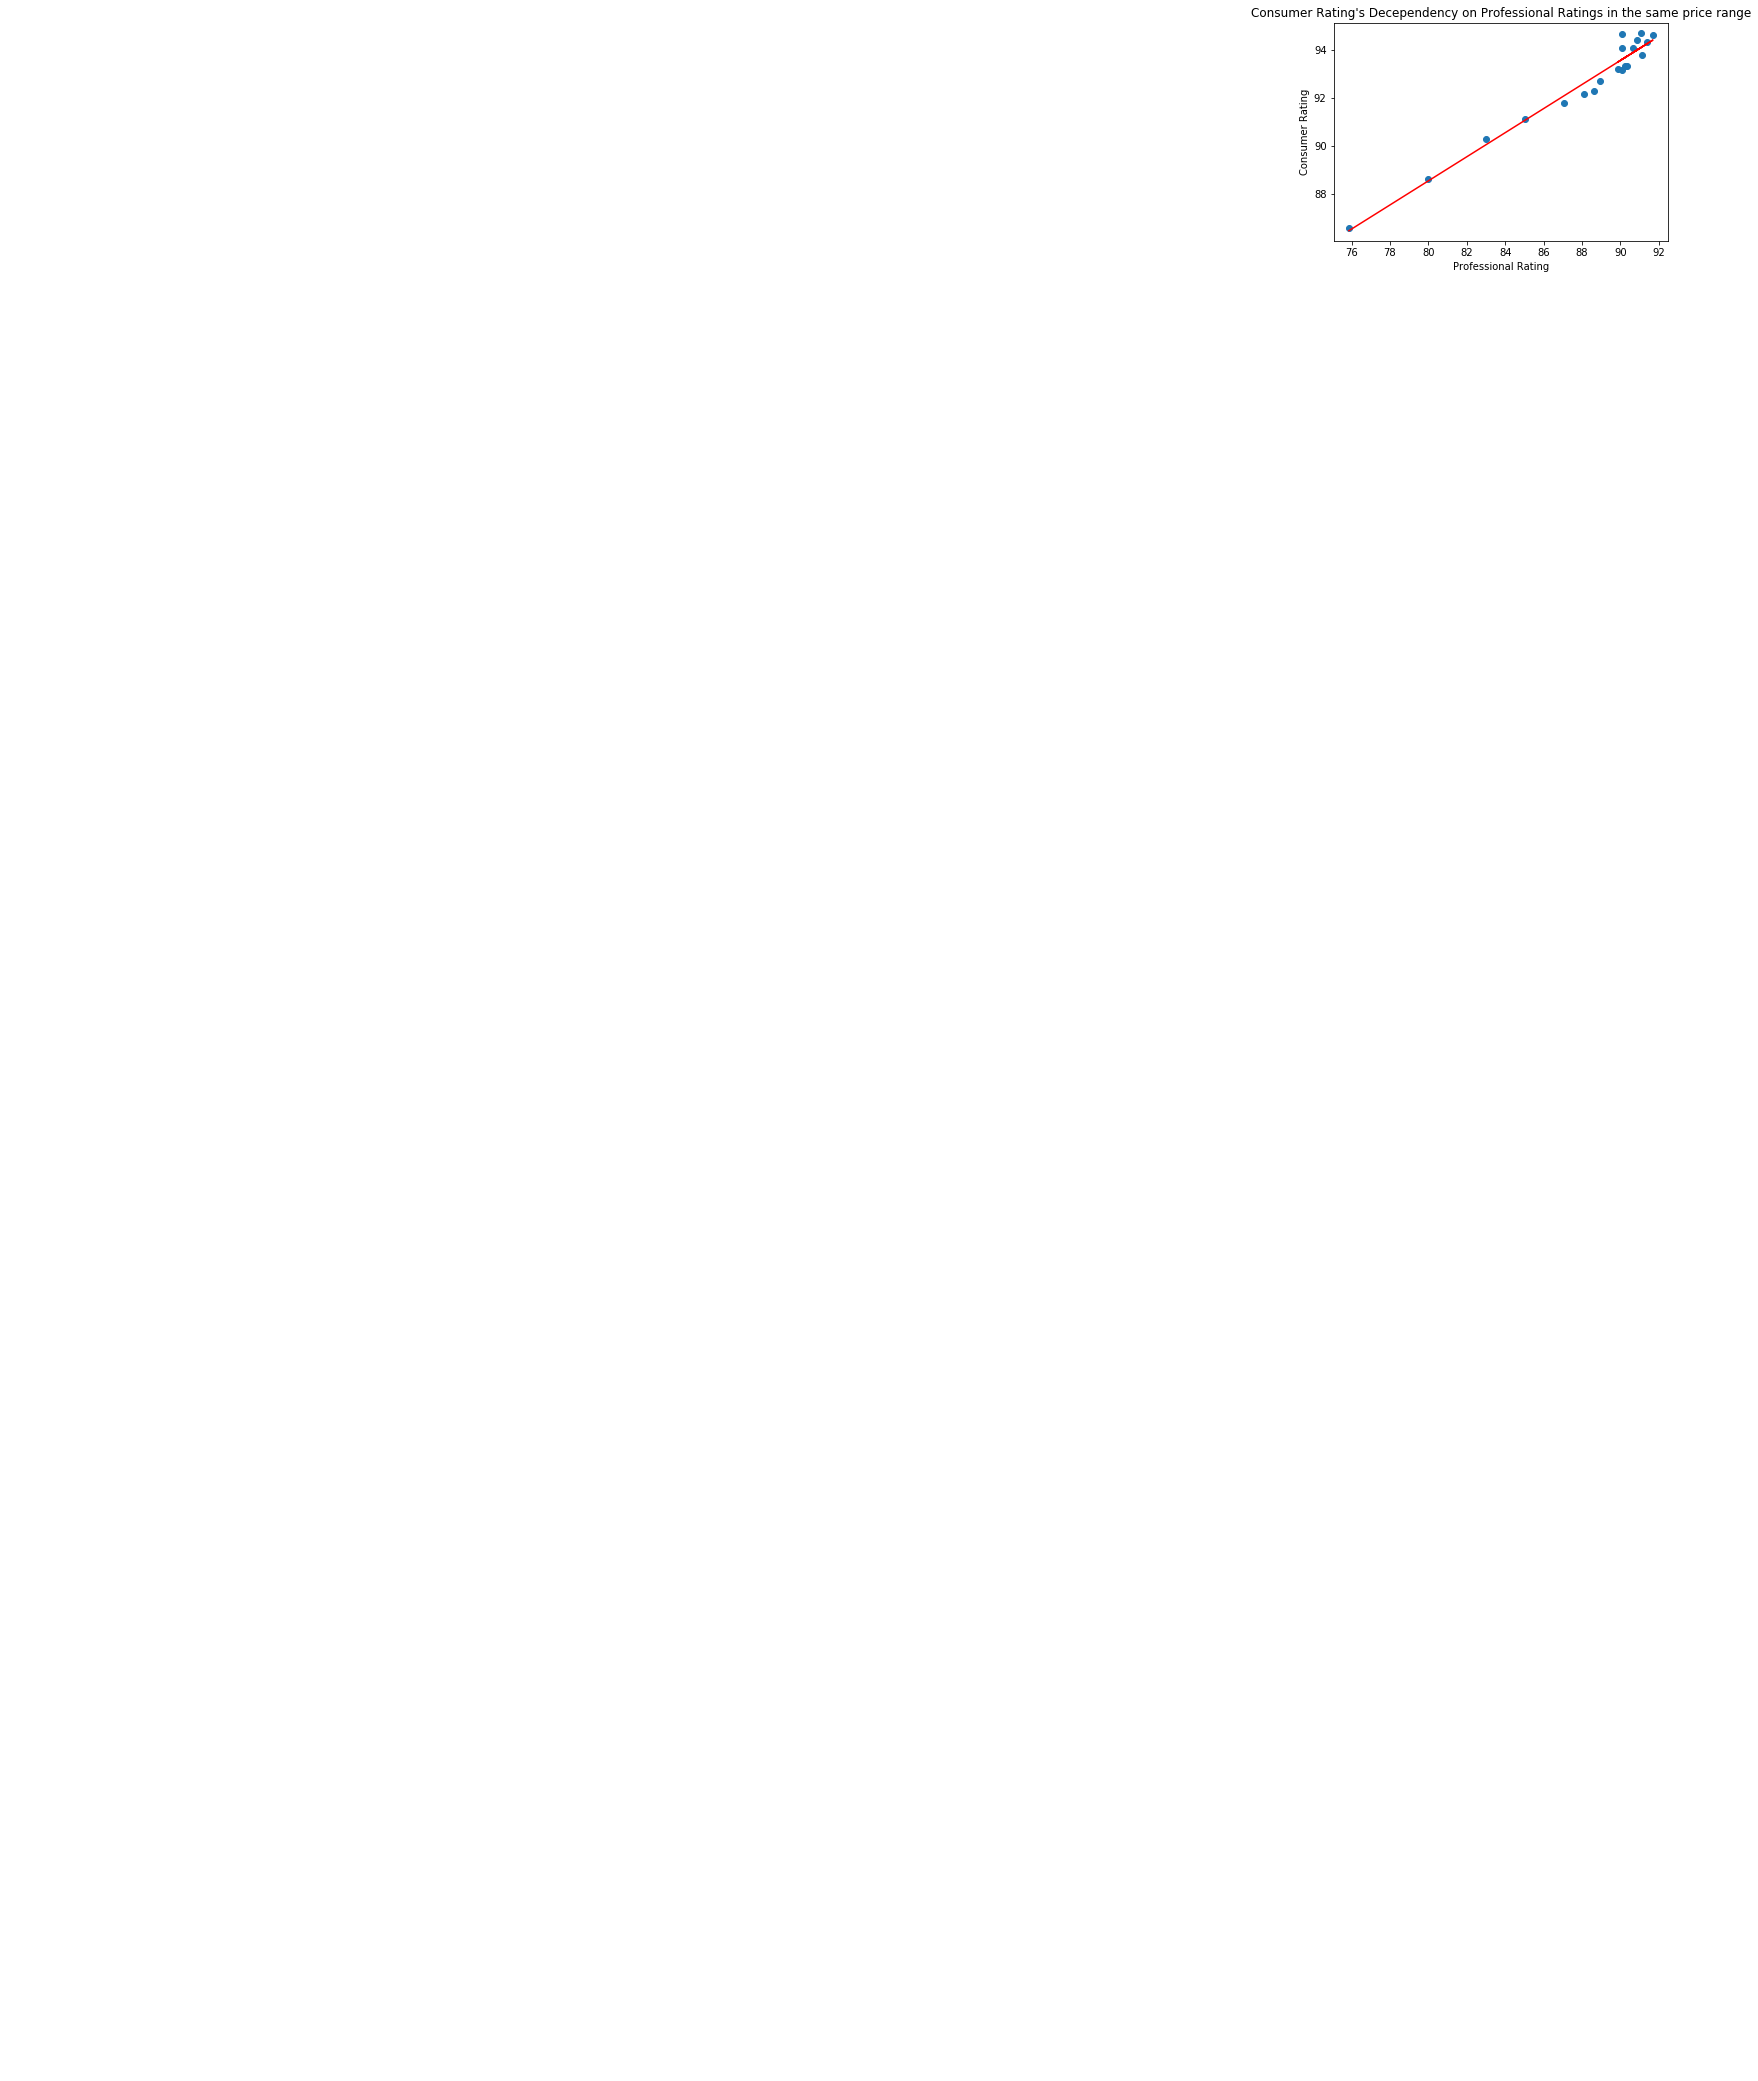

In [49]:
# In what way does consumer rating depend on professional rating for the wines in the same price range?
y_values =merged_df["Professional Rating"]
x_values = merged_df["Mean Consumer Rating"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Consumer Rating's Decependency on Professional Ratings in the same price range")
plt.xlabel('Professional Rating')
plt.ylabel('Consumer Rating')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Price Dependency on Professional Rating on winesin the same price range.png")
plt.show()